In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
mpl.rcParams['image.cmap'] = 'gray'

In [7]:
%pwd

'/content'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving madhav_updated.png to madhav_updated.png


In [ ]:
# Read the image
img = cv2.imread("madhav_updated.png", 0)
plt.rcParams['figure.dpi'] = 500

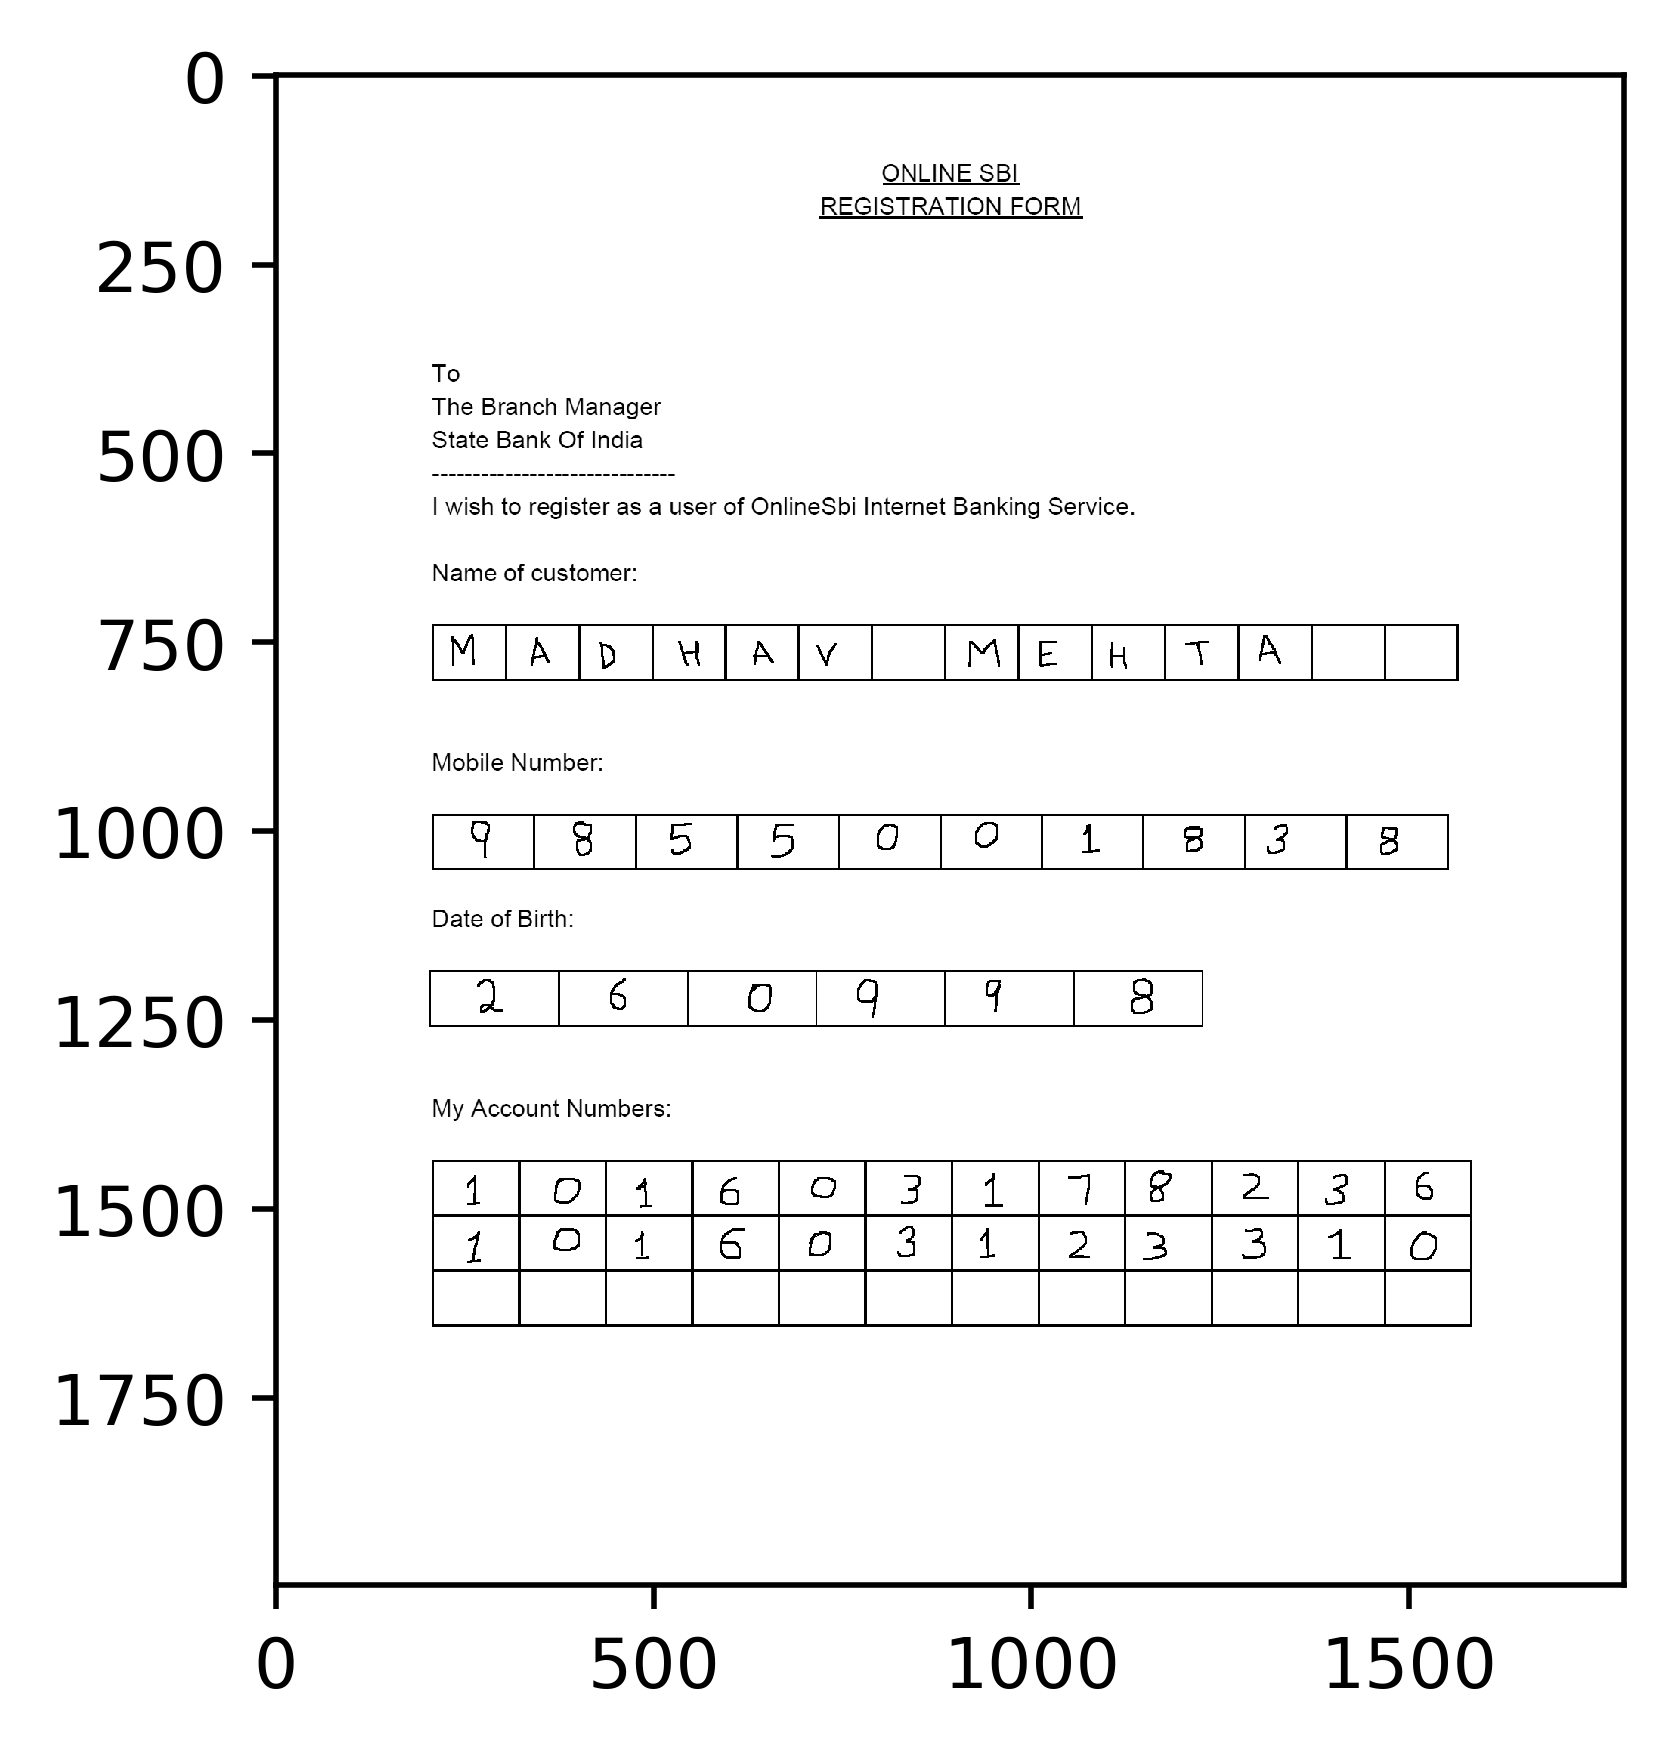

In [ ]:
plt.imshow(img)

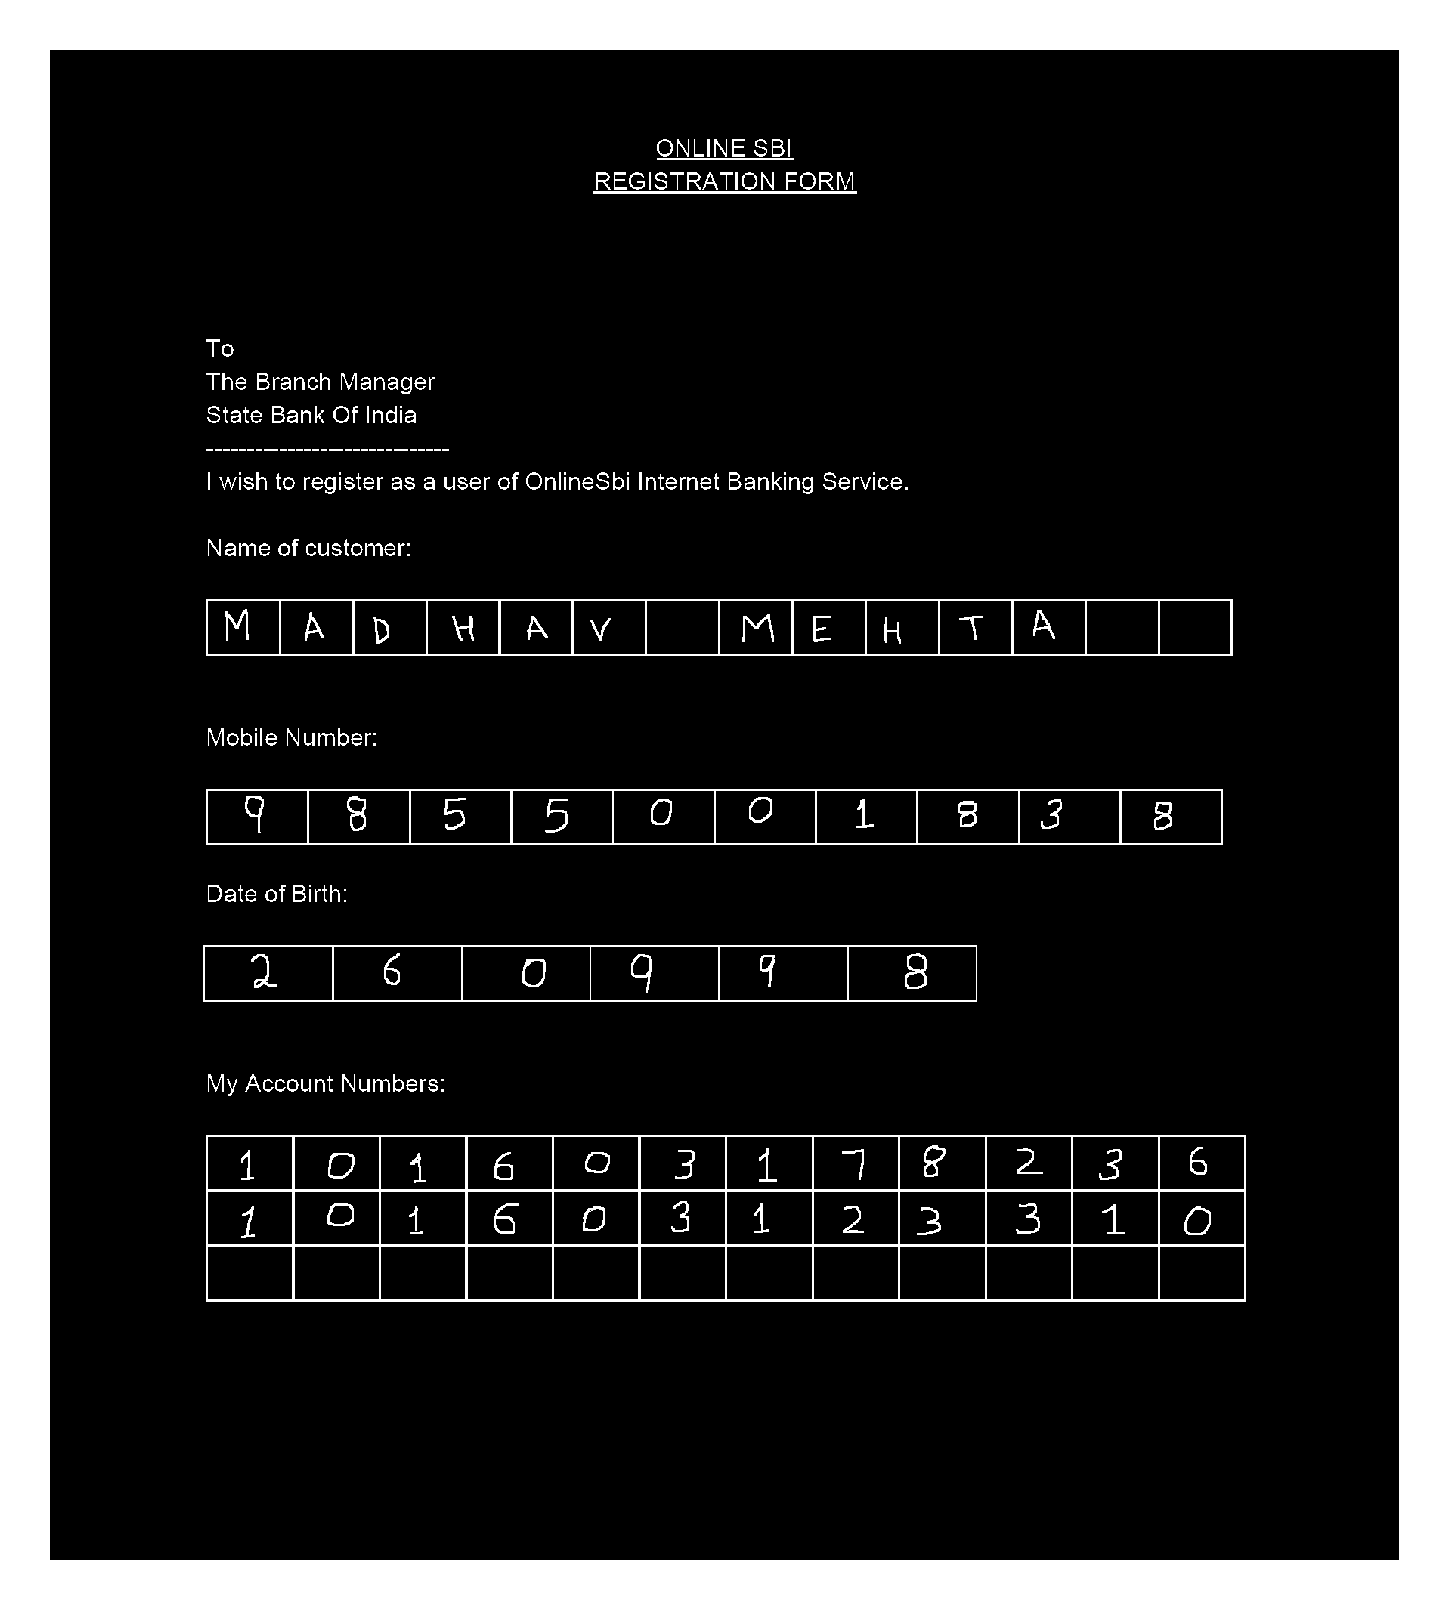

In [ ]:
 # Thresholding the image
(thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY|     cv2.THRESH_OTSU)
# Invert the image
img_bin = 255-img_bin 
cv2.imwrite("Image_bin.jpg",img_bin)
plt.axis('off')
plt.imshow(img_bin);

In [ ]:
def f(x):
    # Defining a kernel length
    global horizontal_lines_img, verticle_lines_img, kernel
    kernel_length = np.array(img).shape[1]//x

    # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
    verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
    # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
    hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
    # A kernel of (3 X 3) ones.
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    # Morphological operation to detect vertical lines from an image
    img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
    verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
    cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
    # Morphological operation to detect horizontal lines from an image
    img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
    horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
    plt.subplot(1, 2, 1)  # 2 rows, 2 columns, 1st subplot = top left
    plt.imshow(verticle_lines_img);
    plt.axis('off')

    plt.subplot(1, 2, 2)  # 2 rows, 2 columns, 2nd subplot = top right
    plt.imshow(horizontal_lines_img);
    plt.axis('off')

interact(f,  x=widgets.IntSlider(min=1,max=255,step=1,value=50));


interactive(children=(IntSlider(value=50, description='x', max=255, min=1), Output()), _dom_classes=('widget-i…

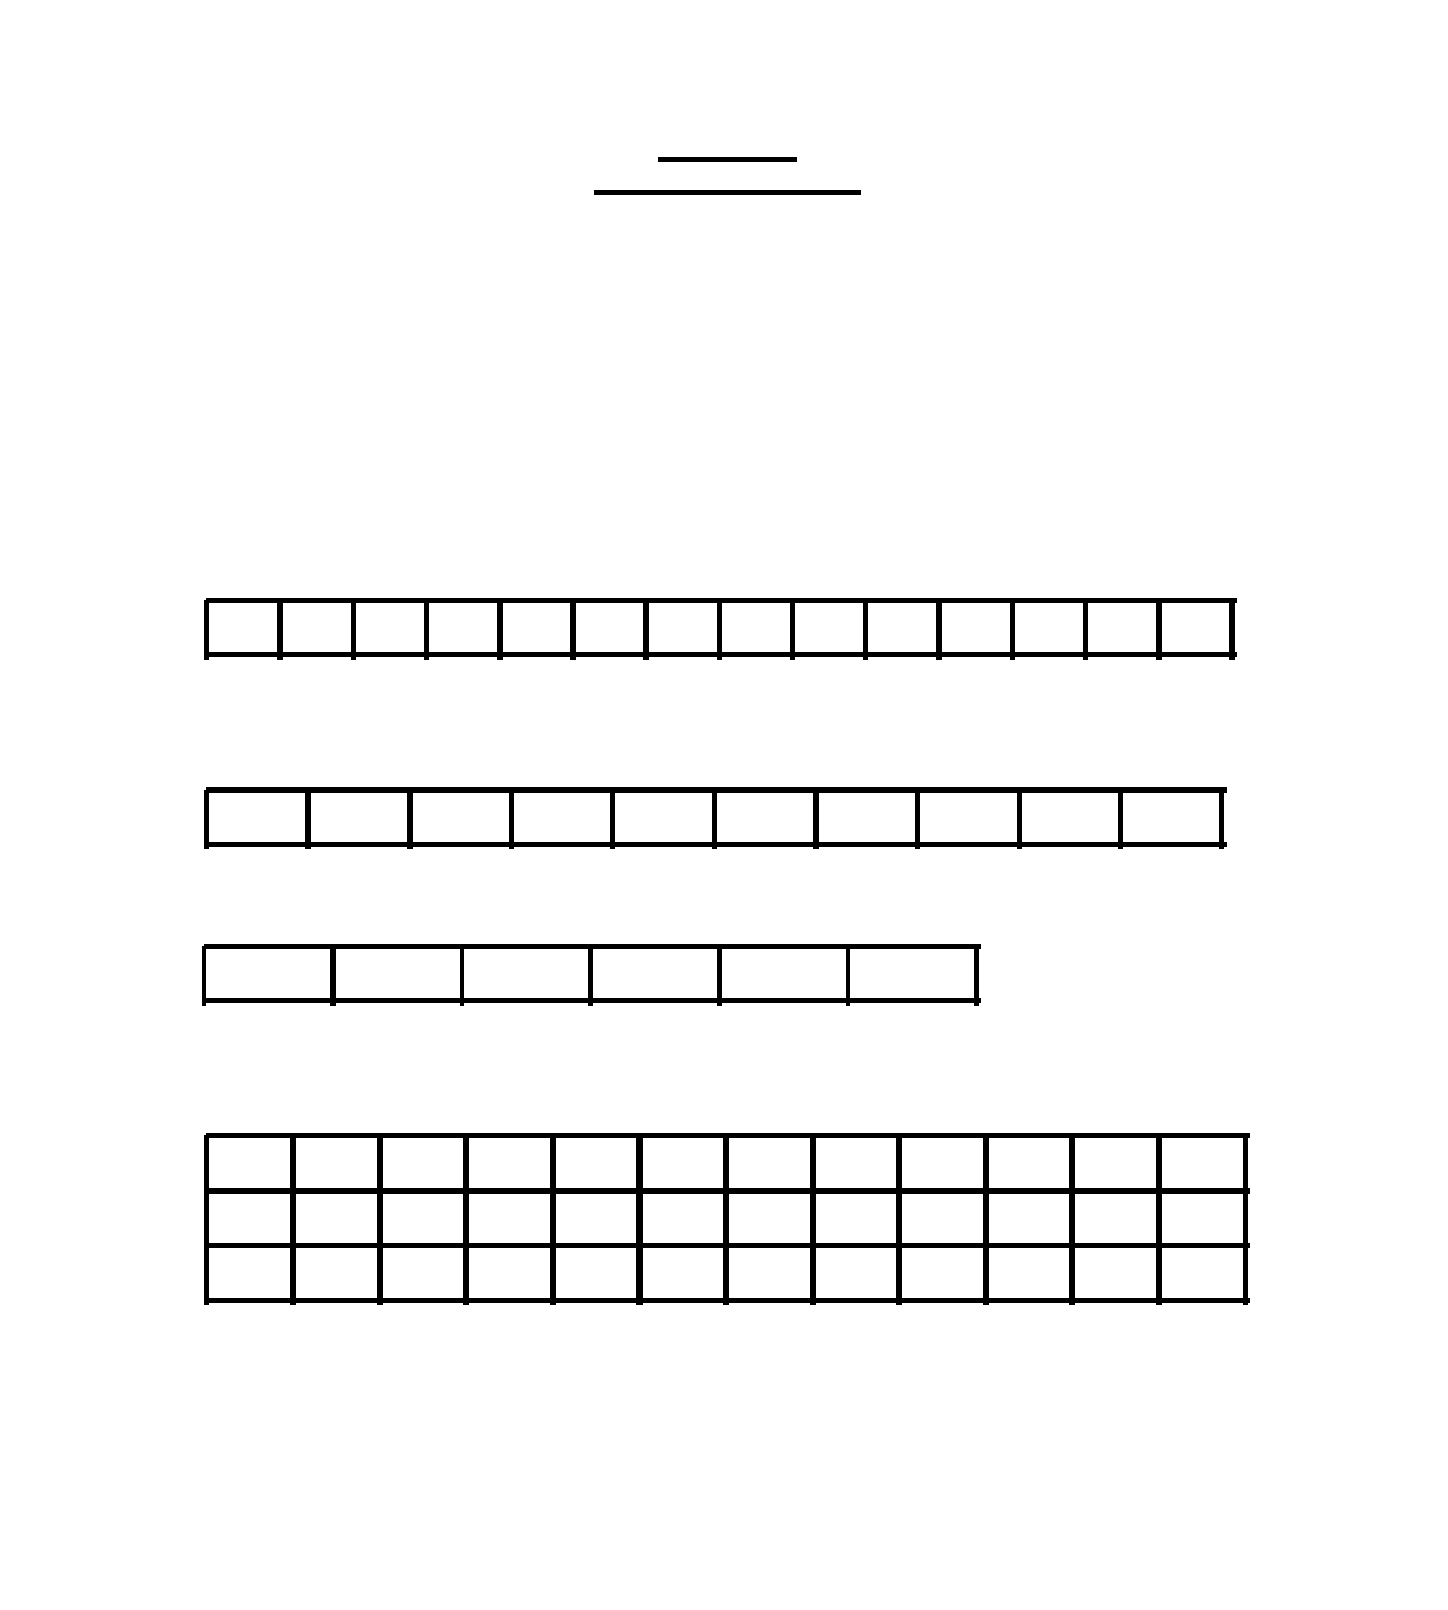

In [ ]:
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
alpha = 0.5
beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
(thresh, img_final_bin) = cv2.threshold(img_final_bin, 128,255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(img_final_bin)

In [ ]:
# Find contours for image, which will detect all the boxes
contours = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
contours.reverse()
# # Sort all the contours by top to bottom.
# (contours, boundingBoxes) = sort_contours(contours, method="right-to-left")

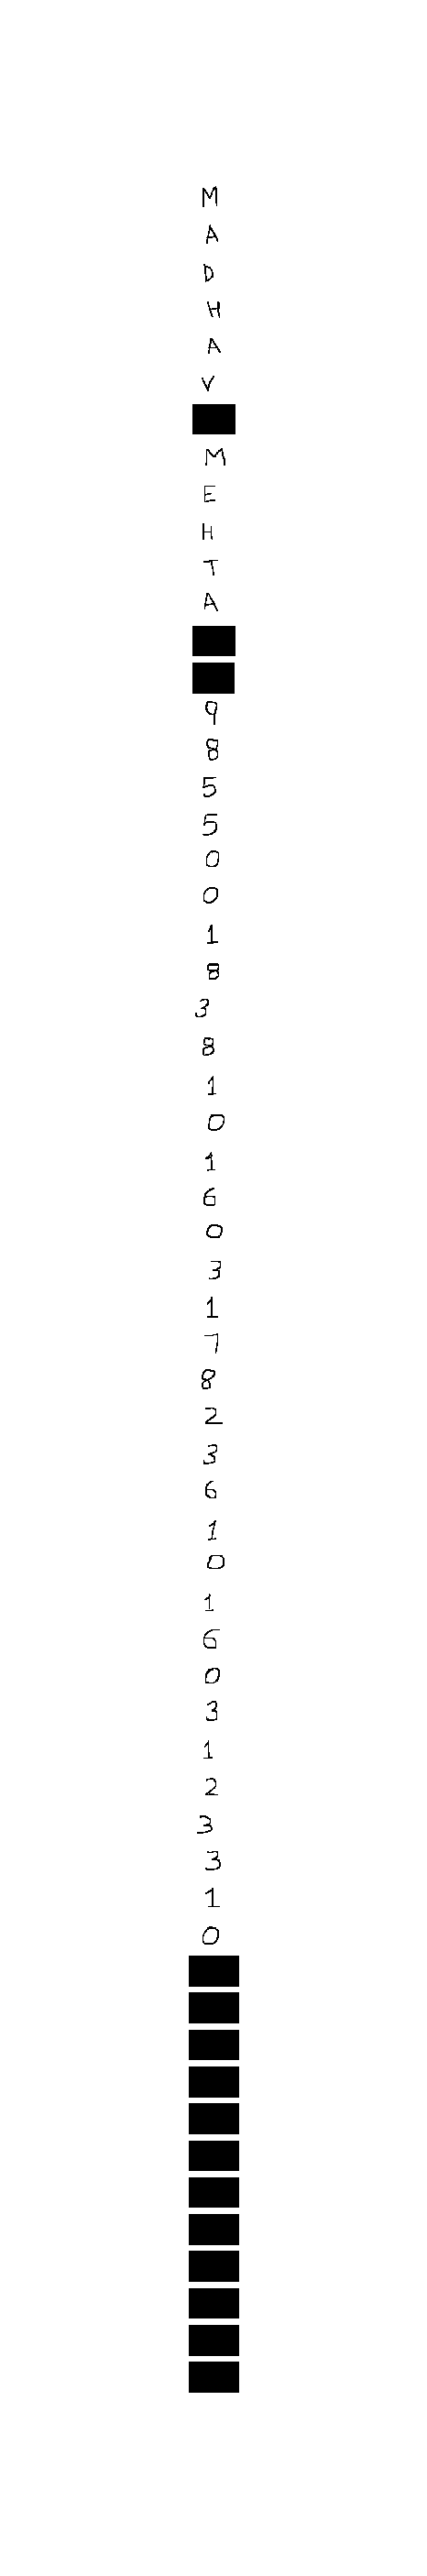

In [ ]:
idx = 0
new_img = img
plt.rcParams['figure.dpi'] = 2000
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    # print(h)
# If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.
    if (h < 150 and w < 150):
        idx += 1
        # cv2.rectangle(new_img, (x, y), (x+w, y+h), (100,100,100), 4)
        # new_img = img[y:y+h, x:x+w]
        # print(h)
        plt.subplot(150,1, idx)
        plt.imshow(new_img[y:y+h, x:x+w] )
        # cv2.imwrite("contour{}.png".format(idx), img[y:y+h, x:x+w])
        plt.axis('off')
# plt.imshow(new_img)
plt.rcParams['figure.dpi'] = 500

In [ ]:
!git clone https://github.com/shubhammor0403/EMNIST.git

Cloning into 'EMNIST'...
remote: Enumerating objects: 58, done.
remote: Total 58 (delta 0), reused 0 (delta 0), pack-reused 58
Unpacking objects: 100% (58/58), done.


In [ ]:
%cd EMNIST

/content/EMNIST


# Loading the model

In [ ]:
from keras.models import load_model
from keras.models import model_from_json

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


loaded_model.load_weights('model.h5')

model = loaded_model


print('Model successfully loaded')

Model successfully loaded


# Word Classification

In [ ]:
id = 0
data = list()
str = ""

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

characters = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z']


#enter input image here
# image = cv2.imread('example.png')
def interpret(image):
  
  height, width = image.shape

  #resizing the image to find spaces better
  image = cv2.resize(image, dsize=(width*5,height*4), interpolation=cv2.INTER_CUBIC)
  #grayscale
  #gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  gray = image

  #binary
  ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)


  #dilation
  kernel = np.ones((5,5), np.uint8)
  img_dilation = cv2.dilate(thresh, kernel, iterations=1)


  #adding GaussianBlur
  gsblur=cv2.GaussianBlur(img_dilation,(5,5),0)


  #find contours
  ctrs = cv2.findContours(gsblur.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  m = list()
  #sort contours
  # sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
  
  sorted_ctrs = ctrs[0] if len(ctrs) == 2 else ctrs[1]
  pchl = list()
  for i, ctr in enumerate(sorted_ctrs):
      # Get bounding box
      x, y, w, h = cv2.boundingRect(ctr)
      # Getting ROI
      roi = image[y-10:y+h+10, x-10:x+w+10]
      try:
        roi = cv2.resize(roi, dsize=(28,28), interpolation=cv2.INTER_CUBIC)
      except Exception as e:
        return

      roi = np.array(roi)
      t = np.copy(roi)
      t = t / 255.0
      t = 1-t
      try:
        t = t.reshape(1,784)
      except Exception as e:
        # print(str(e))
        continue
      m.append(roi)
      pred = model.predict_classes(t)
      global str
      str += characters[pred[0]]
      break;

In [ ]:
idx = 0
plt.rcParams['figure.dpi'] = 100
last_y = 0
for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if (h < 150):
        idx += 1
        if(last_y != 0 and y > last_y + 50):
          id += 1
          data.append(str)
          str = ""
        # plt.subplot(150,1, idx)
#         plt.imshow(new_img)
        interpret(new_img[y:y+h, x:x+w])
        # plt.axis('off')
    last_y = y
print(data)

['', 'MADHAVMEHTA', '9855OOI838', '2GO998', '2D1SO3I78Z3S', 'IOISO31Z33DO']


In [ ]:
final_data = list()
for c in data:
  if c != '':
    final_data.append(c)

In [ ]:
final_data

['MADHAVMEHTA', '9855OOI838', '2GO998', '2D1SO3I78Z3S', 'IOISO31Z33DO']